Introduktion til fft og filtre 
Inspiration og kode fra: https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

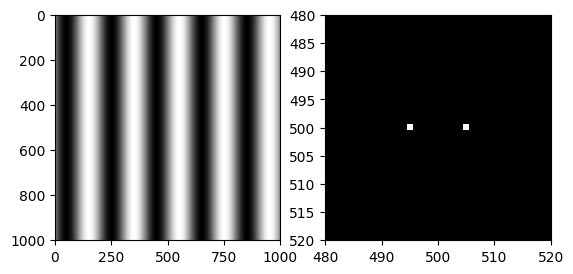

In [423]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

skrå grating->fft->grating

(1001, 1001)


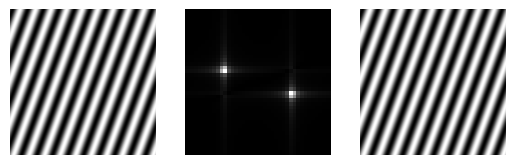

In [425]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
print(X.shape)
wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(131)
plt.imshow(grating)
plt.axis("off")
# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])
# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()

Fra frekvensrummet til billed med invers fft

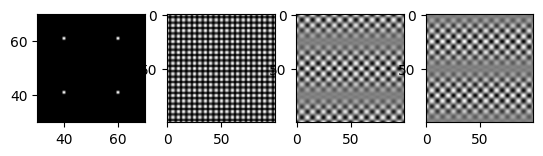

In [435]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt


# Generere et billed 100x100 med og sætte 4 pixels forskellig fra nul.
x = np.zeros(100)
X, Y = np.meshgrid(x, x)

g = X+Y

g[61,40]=1
g[41,60]=1
g[41,40]=1
g[61,60]=1

# plotter de fire hvide prikker
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(g)
plt.xlim([30, 70])
plt.ylim([30, 70])

# invers fft
ft = np.fft.ifftshift(g)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(142)
plt.imshow(abs(ft))

# opdeler i reel og imaginær
plt.subplot(143)
plt.imshow((ft.real))
plt.subplot(144)
plt.imshow((ft.imag))

plt.show()

### fouriertransformation til at lave støjreduktion

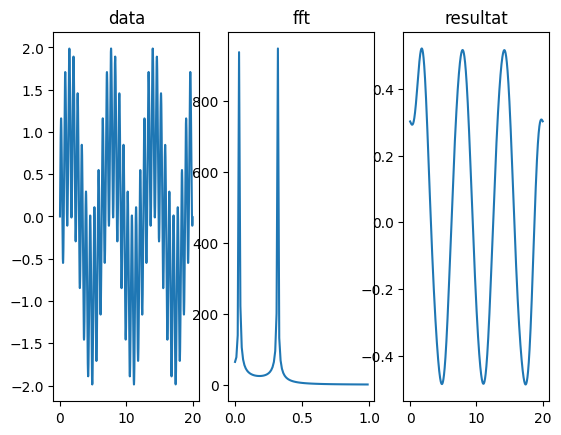

In [420]:
# generere data
x = np.arange(0, 20, 0.01)
y = np.sin(x)+ np.sin(10*x)

# plotter data
plt.subplot(131)
plt.plot(x,y)
plt.title('data')


# fourier-transformation
fy = np.fft.fft(y)

# plotter fft
plt.subplot(132)
plt.plot(x[:100],abs(fy[:100]))
plt.title('fft')



# beholder kun de 10 laveste frekvenser
fy[10:]=0
# invers fourier-transformation
ffy = np.fft.ifft(fy)

# plotter resultat af tranformation og reduktion
plt.subplot(133)
plt.plot(x,ffy)
plt.title('resultat')
plt.show()

### Egen tranformation

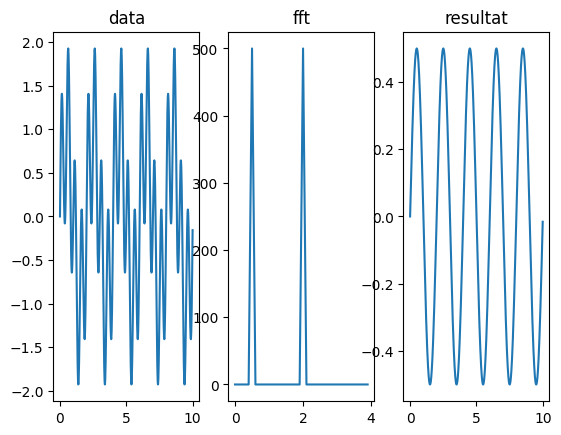

In [444]:
x = np.arange(0, 10, 0.01)
y = np.sin(0.5*2*np.pi*x)+ np.sin(2*2*np.pi*x)
fy = y
fx = np.arange(0,10,0.01)
def ftransform(y):
    X = np.zeros(len(y))+np.zeros(len(y))*1.j
    for k in range(len(y)):
        xs = 0
        for i in range(len(y)):
            xs +=y[i]*np.exp(-1.j*2*np.pi*i/len(y)*k)
        fx[k]=k/max(x)
        X[k]=(xs)
        
    return fx,X

fx,fy = ftransform(y)

plt.subplot(131)
plt.plot(x,y)
plt.title('data')
plt.subplot(132)
plt.plot(fx[:40],abs(fy[:40]))
plt.title('fft')

# fjerner høje frekvenser
fy[10:]=0
d, ffy = ftransform(-fy/len(x))

plt.subplot(133)
plt.plot(x,ffy)
plt.title('resultat')
plt.show()

arbejde med 8x8 pixels, som jpg gør ( næsten ) 

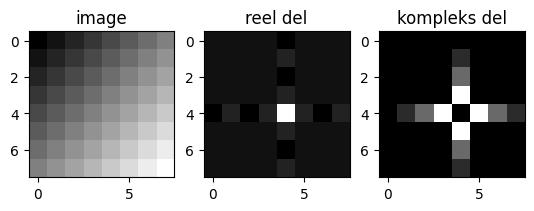

In [412]:
x = np.arange(8)

X, Y = np.meshgrid(x, x)
img = X+Y

ft = np.fft.ifftshift(img)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)


plt.set_cmap("gray")
plt.subplot(131)
plt.imshow(img)
plt.title('image')

plt.subplot(132)
plt.imshow(ft.real)
plt.title('reel del')
#plt.colorbar()

plt.subplot(133)
plt.imshow(abs(ft.imag))
plt.title('kompleks del')
plt.show()
#plt.colorbar()

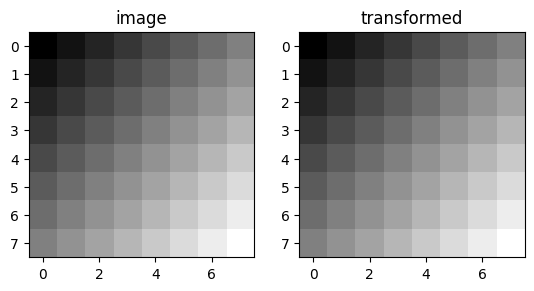

In [413]:
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(img)
plt.title('image')

plt.subplot(122)
plt.imshow(ift.real)
plt.title('transformed')
plt.show()

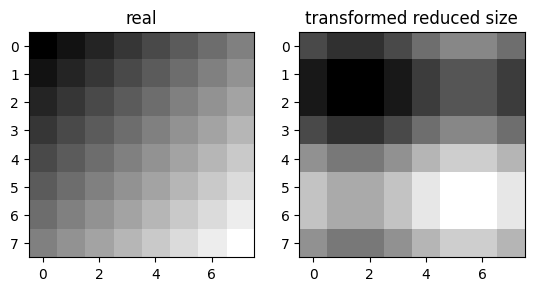

In [359]:
#print(np.round(ft.real,2))
#print(np.round(ft.imag,2))

ft_reduced = np.zeros((8,8))+np.zeros((8,8))*1.j
ft_reduced[3:6,3:6] = ft[3:6,3:6]

ift = np.fft.ifftshift(ft_reduced)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(img)
plt.title('real')

plt.subplot(122)
plt.imshow(ift.real)
plt.title('transformed reduced size')
plt.show()


antal nul: 9


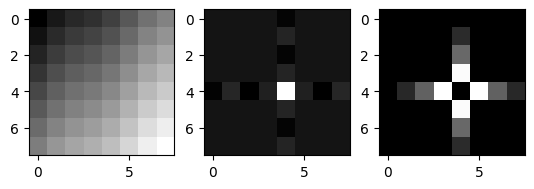

In [451]:
x = np.arange(8)

X, Y = np.meshgrid(x,x)+np.sin(x*1.232)*0.2
img = X+Y

ft = np.fft.ifftshift(img)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

print(f"antal nul: {np.count_nonzero(ft==0)}")

plt.set_cmap("gray")
plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(ft.real)
#plt.colorbar()

plt.subplot(133)
plt.imshow(abs(ft.imag))
#plt.colorbar()
plt.show()

filtrere ved at sætte værdier som absolut<20 til nul.

antal nuller: 49


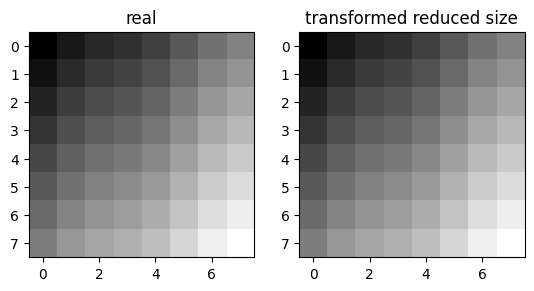

In [452]:

for i in range(8):
    for j in range(8):
        if abs(ft[i,j])<20:
            ft[i,j]=0

print(f"antal nuller: {np.count_nonzero(ft==0)}")

ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(img)
plt.title('real')

plt.subplot(122)
plt.imshow(ift.real)
plt.title('transformed reduced size')
plt.show()

Arbejde med rigtige billeder

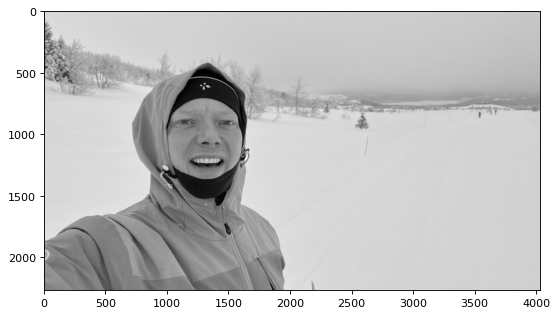

In [453]:
dark_image = imread('sne.JPG')
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

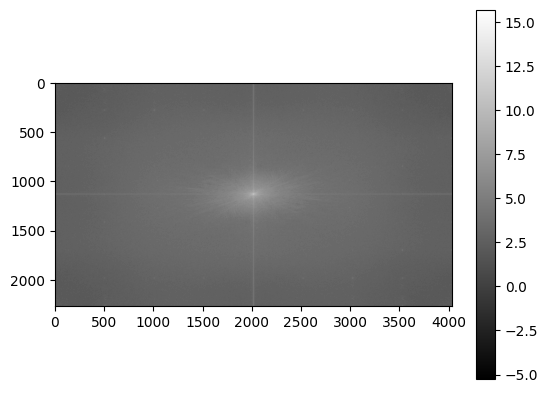

In [471]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');
plt.colorbar()
plt.show()

Det ser ud til at informatilnen er centreret i midten hvor den lav frekvente information er. Lad os fjerne noget

(2268, 4032)
done
antal nuller: 9139167


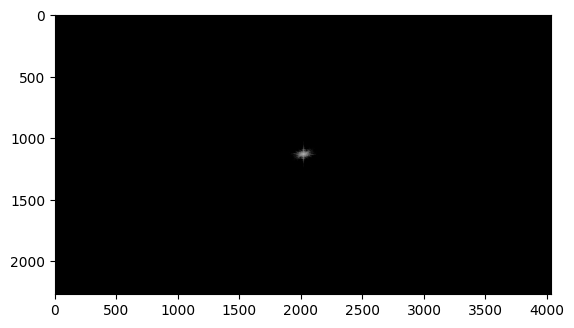

In [486]:
image_fft = np.fft.fftshift(np.fft.fft2(dark_image_grey))
print(image_fft.shape)

for i in range(4032):
    for j in range(2268):
        if np.log(abs(image_fft[j,i]+1))<8:
            image_fft[j,i]=0
plt.imshow(np.log(abs(image_fft)+1), cmap='gray');
print(f"antal nuller: {np.count_nonzero(image_fft==0)}")

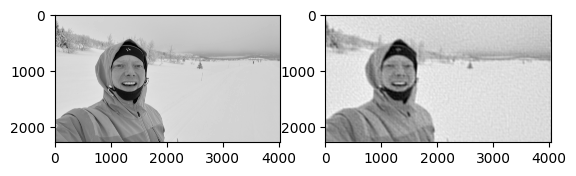

In [484]:
image_fft_back = (np.fft.ifft2(image_fft))
plt.subplot(121)
plt.imshow(dark_image_grey, cmap='gray');
plt.subplot(122)
plt.imshow(abs(image_fft_back), cmap='gray');